# Practice of DataCamp TensorFlow Tutorial

I cover the tutorial, give tips and tricks I found useful, provide references to other sources, as of June, 2018.

There may be better ways of doing the something, and I mention them here.

If I find any ERRORS or learn something NEW, I put them here.

Reference:
https://www.datacamp.com/community/tutorials/tensorflow-tutorial

In [1]:
import sys
sys.executable

'/home/ubuntu16/anaconda2/envs/tensorflow/bin/python'

### Note
You must ensure that Jupyter Notebook is running the Python Kernel that resides inside the virtual environment you had created.

This saves you from unnecessary frustration while trying to load certain module that you'd installed into yout specifically created virtual env, but not accessible here.

References:
https://stackoverflow.com/questions/40694528/how-to-know-which-is-running-in-jupyter-notebook

http://ipython.readthedocs.io/en/stable/install/kernel_install.html#kernels-for-different-environments

As you may notice, this is for Anaconda. So, if you've installed TensorFlow with Anaconda, this is the way to organize your IPython Notebook Kernels. 

In [5]:
import sys 
print(sys.executable)
print(sys.version)
print(sys.version_info)

/home/ubuntu16/anaconda2/envs/tensorflow/bin/python
2.7.15 |Anaconda, Inc.| (default, May  1 2018, 23:32:55) 
[GCC 7.2.0]
sys.version_info(major=2, minor=7, micro=15, releaselevel='final', serial=0)


### Note
The output above will significantly differ when you are using the KERNEL of another environment or the native Python, and not the "tensorflow" virtual environment.

In [2]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


## Record your environment when using IPython Notebook

The iMagic Plugin from https://github.com/rasbt/watermark#installation-and-updating hosted at Anaconda's repository https://anaconda.org/conda-forge/watermark.

An IPython magic extension for printing date and time stamps, version numbers, and hardware information. 

It comes handy when following tutorial such as these from various sources and trying it out on your local machine/installation of TensorFlow.

In [3]:
%watermark

2018-06-19T05:44:09

CPython 2.7.15
IPython 5.7.0

compiler   : GCC 7.2.0
system     : Linux
release    : 4.10.0-28-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 1
interpreter: 64bit


In [10]:
%watermark -p tensorflow,skimage,matplotlib,numpy,random

tensorflow 1.8.0
skimage 0.13.1
matplotlib 2.2.2
numpy 1.14.3
random n


The above is to ensure the packages we are going to use in this walkthrough practise.

## Shortcuts

To shift between the Markdown and Code, use Esc+M or Esc+Y, respectively.

In [13]:
import numpy as np # for vectors, matrices, numpy arrays are used to represent tensor values
import tensorflow as tf # for tensorflow commands

import os # directory info, system info
import random # random number generation

import matplotlib.pyplot as plt # draw plots, fogures, images

# image processing modules from "scikit-image - a lightweight module"
from skimage.color import rgb2gray
from skimage import transform
from skimage import data

## TensorFlow Basics

What is a tensor? 
In TensorFlow, the rank of a tensor = the no dimensions (it differs from the Physics/Maths notation). The shape of a tensor is it's length in each of the dimensions.

### Initialization of Variables


In [19]:
x1 = 3 # rank 0 tensor, shape is [] null
x1 = [1, 2, 3] # rank 1 tensor, shape is [3], NOT USEFUL for LINEAR ALGEBRA
x1 = [[1, 2, 3]] # rank 2 tensor, shape is [1,3], USEFUL for LINEAR ALGEBRA, use this initialization for a row/column
print x1
# print(x1.shape) will not work because it is not an numpy array

[[1, 2, 3]]


In [18]:
x1 = np.array([1, 2, 3]) # rank 1 tensor
print(x1.shape) # note we do not use semicolon in TensorFlow (same as Python)

(3,)


In [20]:
x1 = np.array([[1, 2, 3]]) # rank 2 tensor
print(x1.shape)

(1, 3)


In [22]:
x1 = np.array([[1],[2],[3]]) # rank 2 tensor as a COLUMN VECTOR, ALWAYS USE THIS FORM of initialization
print(x1.shape)

(3, 1)


In [23]:
# MORE EXAMPLES
x1 = [[1, 2, 3], [7, 6, 5]] # rank 2 tensor of shape [2,3], a matrix as in Matlab/Octave, and Maths notation
x2 = [[[1., 2., 3.]], [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]

### TensorFlow Constants

An int32 is not converted into float32 by default for the multiplication

In [25]:
c1 = tf.constant([[1., 2., 3., 4., 5.]]) # a rank 2 constant, NOTICE the dot after 1, 2 etc. to make it float32 type
c2 = tf.constant([[.3, 0.4, 0.6, 0.7, 0.1]])

result = tf.multiply(c1, c2) # multiply them, element wise multiplication

print(result)

Tensor("Mul_1:0", shape=(1, 5), dtype=float32)


## Note:
It does not print the result, because this is just a graph. The actual multiplication will be done when a session is invoked using tf.Session(). Refer https://www.tensorflow.org/programmers_guide/low_level_intro

ALso, Tensor, above does not even hold any values that were passed c1 and c2. It is just the computation graph.



In [27]:
sess = tf.Session() # invoke/start a session
print(sess.run(result)) # runs or executes the graph called "result"
sess.close() # closes the session

[[0.3       0.8       1.8000001 2.8       0.5      ]]


In [30]:
# Import `tensorflow`
import tensorflow as tf

# Initialize two constants
c1 = tf.constant([1,2,3,4]) # Only intezers
c2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(c1, c2)

# Initialize Session and run `result`
with tf.Session() as sess:
    output = sess.run(result)
    print(output)
    
# A COMPLETE CODE

[ 5 12 21 32]


### Note: 

Session starts with uppercase S, while others start with lowercase

## config and ConfigProto

These are used to give additional options to the default session that we used above. You canspecify some configuration options to the default Session using the config argument, and the ConfigProto protocol.

In [31]:
config = tf.ConfigProto(log_device_placement = True) # logs the CPU/GPU used for the Session

## Exploring your Dataset
It is natural to begin with reading your data, exploring its structure/unstructured format so that we can understand what kind of preprocessing it needs before feeding it to the neural network model.

For ex. Alex Krichevsky's AlexNet requires you have a certain resolution of images, in gray scale.

We shall use matplolib and scikit-image for this purpose. We use os module to list and read the directory structure.

Here we start with the Belgian Traffic Sign Dataset.

### Introduction 

1. The signs are in Dutch and French. But, that is not of any concern to our neural network.
2. On January, 2017 over 30,000 traffic signs were removed from the streets
3. Belgium, and Europe for that matter, has an overwhelming number of traffic signs
4. Belgium has 6 categories of traffic signs such as the warning sign, prioroty sign, safety and parking etc.


### Downloading

We go to Google for help. Go to https://btsd.ethz.ch/shareddata/ You should get the two zip files listed next to "BelgiumTS for Classification (cropped images), which are called "BelgiumTSC_Training" and "BelgiumTSC_Testing". It is at under the heading ANNOTATIONS, the third set from the top.

1. BelgiumTSC_Training - 171.3 MB
2. BelgiumTSC_Testing - 76.5 MB

### Note
One thing you can note that the entire dataset is often diviced into Train, Test and Validation(optional). The Train:Test can be like 70:30 for example.

### Format
The dataset you just downloaded has 2 separate folders. Each of the Training and Testing folder has 62 subfolders inside it named from 00 to 61. So, these contain 62 types of traffic signs and the name of the subfolder is also their class label. That is, a .ppm image in subfolder 00 is of class label 00.

## Read and Store
1. We start with an user defined function e.g. import_data()
2. We then create a variable to store the ROOT_PATH. This can be your directory where you have put all the files. In my case it is the Desktop, where I've a main folder named "tensorflow_datacamp" OR it can be you Downloads folder
3. We use two variables "train_directory" and "test_directory" to store the individual paths to the train/text data
4. We can then simply join() the ROOT_PATH to the individual train/test paths

Now, import_data() is a generic function which takes one argument as the name of the dorectory you want to read. So, 1st you give the train, Next you give the test. 

When you give the path of the train/text as argument, 
1. import_data() joins it to the ROOT_PATH, 
2. finds the directory, goes into the directory, 
3. looks for subdirectories, 
4. if found, adds them to the list, 
5. reads the images and their subfolder name, 
6. creates a list with their labels, which is the name of the subfolder in which they're found.

### In here
I've unzipped the datasets after downloading, created a folder in my main tensorflow_datacamp as belgium_trafficSigns and put the unzipped train and test folders there. For example, on extracting "BelgiumTSC_Testing.zip" you get "Testing" folder.

In [45]:
def import_data(data_dir_path):
    # directories contains the full paths to all the subdirectories (also label names)
    directories = [d for d in os.listdir(data_dir_path)
                  if os.path.isdir(os.path.join(data_dir_path, d))]
    print(directories)
    print(len(directories))

In [46]:
os.getcwd()
# is handy to get the current working directory, 
#if you'd invoked iPython notebook from the same path, you can use it directly

import_data("/home/ubuntu16/Desktop/tensorflow_datacamp")
# give the path inside double quotes as the argument

import_data("/home/ubuntu16/Desktop/tensorflow_datacamp/belgium_trafficSign")

import_data("/home/ubuntu16/Desktop/tensorflow_datacamp/belgium_trafficSign/Training")

# this shows that import_data() is generic and wil produce output for the path you shall pass as argument
# also, we have 62 subdirectories

['belgium_trafficSign', 'datacamp-community-tutorials', 'my_assignments']
3
['Training', 'Testing']
2
['00038', '00014', '00049', '00030', '00008', '00044', '00015', '00017', '00036', '00028', '00033', '00043', '00027', '00011', '00005', '00006', '00054', '00052', '00035', '00061', '00037', '00004', '00012', '00058', '00025', '00042', '00048', '00021', '00024', '00034', '00026', '00051', '00039', '00053', '00059', '00046', '00055', '00057', '00003', '00040', '00020', '00010', '00001', '00007', '00022', '00041', '00047', '00018', '00016', '00029', '00002', '00009', '00013', '00031', '00045', '00050', '00056', '00032', '00023', '00000', '00019', '00060']
62


In [55]:
def import_data(data_dir_path):
    
    directories = [d for d in os.listdir(data_dir_path)
                  if os.path.isdir(os.path.join(data_dir_path, d))]
    print("Success!! Directories found: " + str(len(directories)))
    # print(type(directories)) # is list type, above syntax of declaring lists IS USEFUL
    
    images = []
    labels = []
    
    for d in directories

In [56]:
import_data("/home/ubuntu16/Desktop/tensorflow_datacamp/belgium_trafficSign/Training")

Success!! Directories found: 62


### Note:
Use type() to check the type of Python variable you're dealing with, and learn it's initialization, declaration, and definition styles

In [69]:
def import_data(data_dir_path):
    
    directories_list = [d for d in os.listdir(data_dir_path)
                  if os.path.isdir(os.path.join(data_dir_path, d))]
    
    print("Success!! Directories found: " + str(len(directories_list)))
    
    # initialize 2 null lists
    images = []
    labels = []
    img_count = 0;
    
    for d in directories_list:
        
        label_dir_path = os.path.join(data_dir_path, d);
        
        # find the number of images, names in each sub-dir
        file_names_list = [os.path.join(label_dir_path, f) for f in os.listdir(label_dir_path)
                          if f.endswith(".ppm")]
        
        print("Success!! Files/Images found: " + str(len(file_names_list)) + " in sub-dir " + str(d))
        img_count = img_count + len(file_names_list)
        
    
    print("Training: " + str(img_count) + " images")

In [70]:
import_data("/home/ubuntu16/Desktop/tensorflow_datacamp/belgium_trafficSign/Training")

Success!! Directories found: 62
Success!! Files/Images found: 285 in sub-dir 00038
Success!! Files/Images found: 43 in sub-dir 00014
Success!! Files/Images found: 12 in sub-dir 00049
Success!! Files/Images found: 37 in sub-dir 00030
Success!! Files/Images found: 27 in sub-dir 00008
Success!! Files/Images found: 48 in sub-dir 00044
Success!! Files/Images found: 9 in sub-dir 00015
Success!! Files/Images found: 79 in sub-dir 00017
Success!! Files/Images found: 18 in sub-dir 00036
Success!! Files/Images found: 125 in sub-dir 00028
Success!! Files/Images found: 12 in sub-dir 00033
Success!! Files/Images found: 30 in sub-dir 00043
Success!! Files/Images found: 18 in sub-dir 00027
Success!! Files/Images found: 7 in sub-dir 00011
Success!! Files/Images found: 11 in sub-dir 00005
Success!! Files/Images found: 18 in sub-dir 00006
Success!! Files/Images found: 118 in sub-dir 00054
Success!! Files/Images found: 27 in sub-dir 00052
Success!! Files/Images found: 60 in sub-dir 00035
Success!! Files/I

In [74]:
# we add return values for images and labels
def import_data(data_dir_path):
    
    directories_list = [d for d in os.listdir(data_dir_path)
                  if os.path.isdir(os.path.join(data_dir_path, d))]
    
    print("Success!! Directories found: " + str(len(directories_list)))
    
    # initialize 2 null lists
    images = []
    labels = []
    img_count = 0;
    
    for d in directories_list:
        
        label_dir_path = os.path.join(data_dir_path, d);
        
        # find the number of images, names in each sub-dir
        file_names_list = [os.path.join(label_dir_path, f) for f in os.listdir(label_dir_path)
                          if f.endswith(".ppm")]
        
        img_count = img_count + len(file_names_list)
        
        # read all the images inside each sub-dir
        for f in file_names_list:
            images.append(data.imread(f))
            labels.append(int(d))
        
    
    print("Training: " + str(img_count) + " images")
    return images, labels

In [83]:
ROOT_PATH = "/home/ubuntu16/Desktop/tensorflow_datacamp/"
training_data_dir_path = os.path.join(ROOT_PATH, "belgium_trafficSign/Training")
testing_data_dir_path = os.path.join(ROOT_PATH, "belgium_trafficSign/Testing")

# training data
images, labels = import_data(training_data_dir_path)

# testing data
imagesT, labelsT = import_data(testing_data_dir_path)

Success!! Directories found: 62
Training: 4575 images
Success!! Directories found: 62
Training: 2520 images


### Results
Success!! Directories found: 62
Training: 4575 images

Success!! Directories found: 62
Training: 2520 images

and now we can proceed with visualizations.

In [84]:
# use np.array() to convert the lists of images and labels to numpy arrays
print("images type: " + str(type(images)))
print("labels type: " + str(type(labels)))

images type: <type 'list'>
labels type: <type 'list'>


### Inspection

In [90]:
images_array = np.array(images)
labels_array = np.array(labels)

print("images_array dim: " + str(images_array.ndim) + " size: " + str(images_array.size))
print("labels_array dim: " + str(labels_array.ndim) + " size: " + str(labels_array.size))
images_array.shape

images_array dim: 1 size: 4575
labels_array dim: 1 size: 4575


(4575,)

In [115]:
# print first image from the numpy array
print(images_array[0])
print("Shape: {0}, min {1}, max {2}".format(images_array[0].shape, images_array[0].min(), images_array[0].max()))

[[[83 99 75]
  [83 97 72]
  [80 93 68]
  ...
  [54 58 34]
  [51 55 32]
  [47 51 28]]

 [[78 96 73]
  [79 97 74]
  [79 96 73]
  ...
  [66 67 41]
  [65 65 40]
  [62 62 38]]

 [[67 87 65]
  [70 91 69]
  [72 93 71]
  ...
  [76 76 50]
  [77 76 50]
  [77 75 50]]

 ...

 [[25 28 19]
  [27 30 21]
  [28 32 23]
  ...
  [13 13 10]
  [14 15 14]
  [16 18 18]]

 [[30 33 25]
  [29 32 24]
  [27 31 22]
  ...
  [14 14 10]
  [14 14 12]
  [14 15 14]]

 [[35 38 31]
  [32 35 27]
  [28 31 23]
  ...
  [15 15 10]
  [13 13 10]
  [12 13 10]]]
Shape: (51, 49, 3), min 0, max 255


### Note
The above representation of a single image, and 4k+ of those in the images_array is called "array within array" or "multidimensional array" or "array of arrays" as in the early days 90s C++/C names

TENSORFLOW NOTATION : The image above is a 51x49 resolution image. It is in RGB format. You can also see the starting 3 square brackets, meaning that it is an 3 dim array or rank 3 tensor, with the length of each dimension being 51, 49 and 3.

NUMPY ARRAYS PROPERTIES: We shall use the .shape, .min() and .max() to later find that not all the cropped images are of the same size. This can create a problem with the neural network. Why? Because, a neural network cannot have variable number of nodes in a layer.

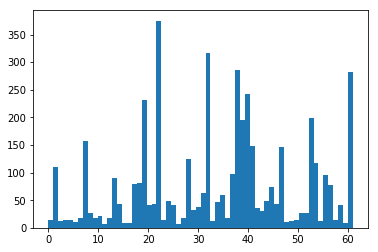

In [93]:
# matplotlib.pyplot was imported as plt
plt.hist(labels, len(set(labels)))
plt.show() # erasing this line, also prints the histogram values

## Visualize
Now, we shall look at the images. Each image is stored in images_array at some serial number. 

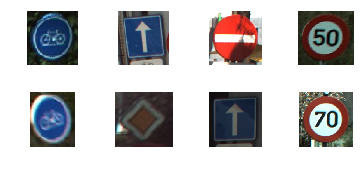

In [113]:
want_to_see = [23, 2023, 3023, 4023, 30, 1030, 2030, 4030] # we have 4575 images in training set

for i in range(len(want_to_see)):
    plt.subplot(3, 4, i+1)
    #plt.imshow(images_array[i]) the ARRAY representation is for operations ONLY
    plt.axis("off")
    #plt.imshow(rgb2gray(images[want_to_see[i]])) TOGGLE this to see what happens
    plt.imshow(images[want_to_see[i]])
    plt.subplots_adjust(wspace=0.5) # width between subplots
    plt.subplots_adjust(hspace=0.5) # height "
    
plt.show()

In [109]:
# the class labels for the above traffic signs
for i in range(len(want_to_see)):
    print(labels[want_to_see[i]])

38
53
22
32
38
61
53
32


In [110]:
# some more information about the array list
print(images_array.flags)
# the memory layout of the list, array within arrays

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [111]:
print(images_array.itemsize)
# length of one or each array element in bytes
print("Total size: " + str(images_array.nbytes) + " Bytes")

8
Total size: 36600 Bytes


### Note
NUMPY ARRAY PROPERTIES: We can use .flags, .itemsize and .nbytes to view more information about the memory layout of an numpy array

### Histogram : What does it tell?

We can see that not all the classes are equally represented in the dataset. So, for some class we have just 10 samples while for another one we have more than 350. This is a case of clear class imbalance, and this is a separate topic on its won to be studied.

There are several methods, random and structured, to deal with this sort of imbalance. The output is a dataset which has equal number of obsevations for each of the classes. The idea being, strongly skewed classes tend to predict the class label for the one that has more number of samples. 

Shape: (57, 58, 3), Min Intensity: 36, Max Int. 255


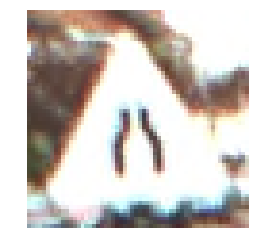

Shape: (200, 223, 3), Min Intensity: 0, Max Int. 255


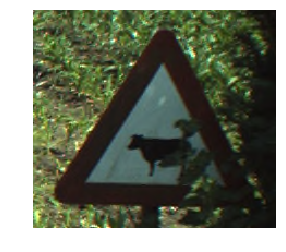

Shape: (91, 82, 3), Min Intensity: 4, Max Int. 255


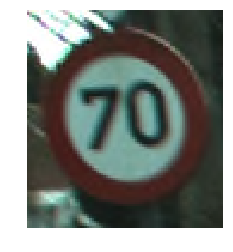

Shape: (252, 231, 3), Min Intensity: 0, Max Int. 255


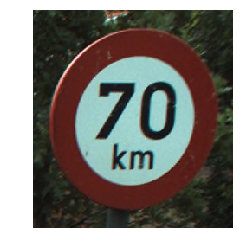

In [123]:
# Let us compare the image sizes for a bunch of images
want_to_compare = [300, 3650, 4000, 4250]

for i in range(len(want_to_compare)):
    plt.axis("off")
    plt.imshow(images[want_to_compare[i]]) # NOTE: that this can be done from numpy arrays too i.e images_array
    print("Shape: {0}, Min Intensity: {1}, Max Int. {2}".format(images[want_to_compare[i]].shape,
         images[want_to_compare[i]].min(),
         images[want_to_compare[i]].max()))
    plt.show()


### Image Scale
As mentioned earlier, this can pose a problem to the neural network. So, we need to do some preprocessing.

### Note
Note how you use the format() method on the string "shape: {0}, min: {1}, max: {2}" to fill out the arguments {0}, {1}, and {2} that you defined.

1. We can use both the "images_array" to visualize the images, and also the images "list

('unique_labels: ', set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]))


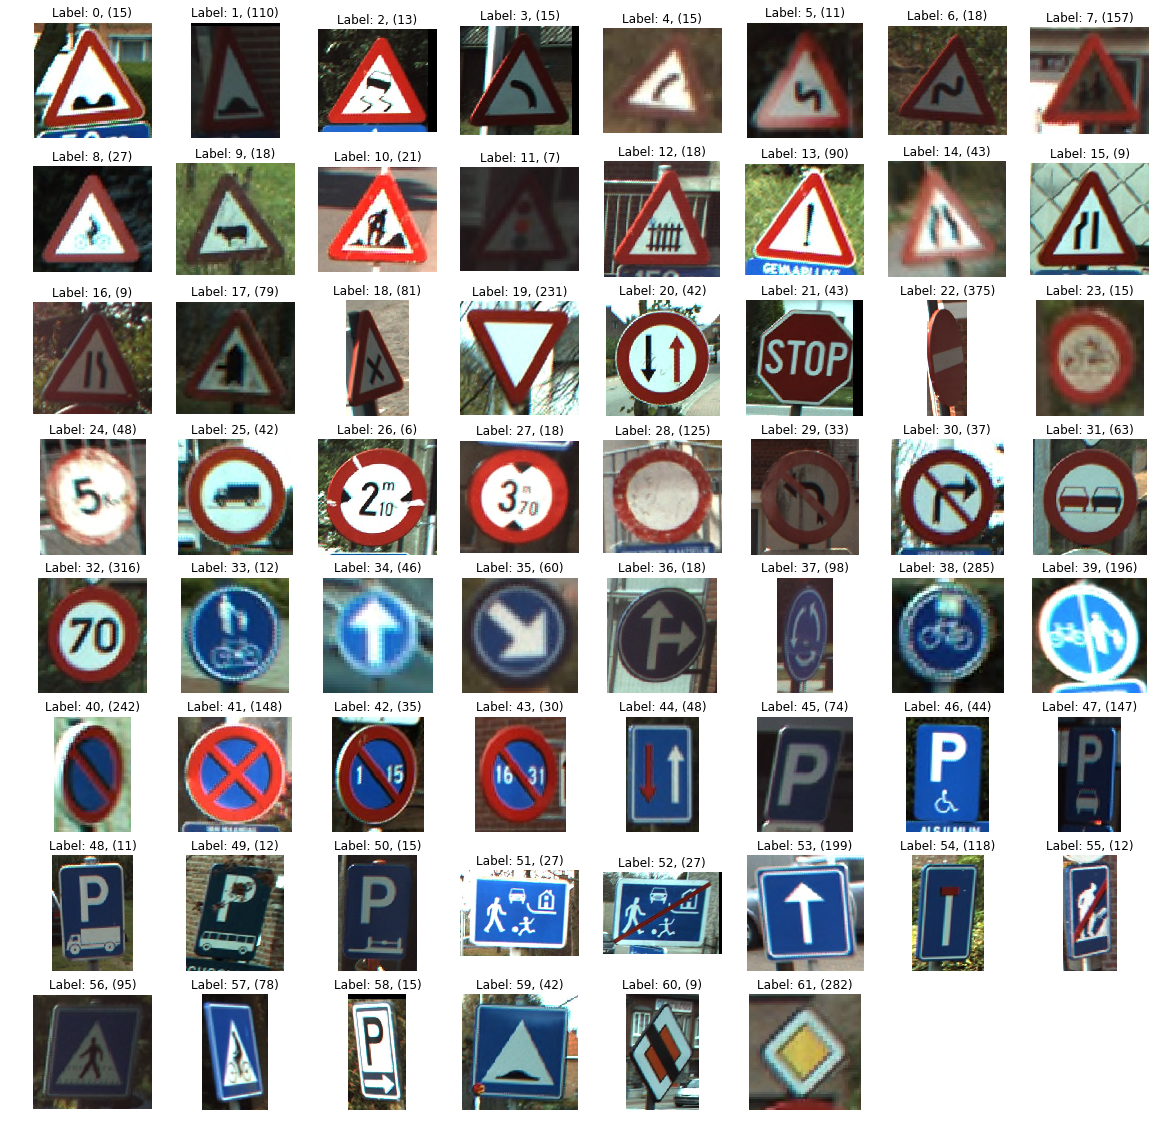

In [135]:
# set() command helps to get the unique entries in a list
unique_labels = set(labels)
# unique_labels contain the unique entries in the "labels" list
print("unique_labels: ", unique_labels)

# initialize a figure size, we want to plot all 62 classes, one fig from each
plt.figure(figsize=(20,20))

# labels.index(i) returns the serial number or index of 1st occurance of an item "i" in the list "labels"
# labels.count(i) stores the number of times an unique entry "i" was repeated in "labels" list
# because, to get the image at the same serial number, we need it's original index in "labels", not unique_labels

# set kounter k
k = 1;

for i in unique_labels:
    image = images[labels.index(i)] # first index = first image
    plt.subplot(8, 8, k) # 64 is closest square to 62, so 8x8 grid is taken
    plt.axis("off")
    plt.title("Label: {0}, ({1})".format(i, labels.count(i)))
    plt.imshow(image)
    k = k+1

plt.show()

## Feature Extraction

We need to to preprocessing of the images. Understand that this is not the actual feature extraction such as hand-engineered featueres like SIFT or HarrisCorners we know from Image Processing. 

Of course, here features are extracted by the neural network itself, on its own. And, that makes it a really self-learning model like CNN.

### Preprocessing
We need to recall the following:
1. The images are in RGB format (CNN can use RGB or Gray, your wish)
2. The images must be strictly resized (not rescaled)
3. The number of samples for each label is unequal. MOst heavy presence is of prohibitory signs (22, 32), then priority signs(38, 61)
4. There is no connection between the heavily present labels (correlation is nil), so are distinctive classes

### Question 1
Does transform.resize() from skimage work on numpy arrays?

In [136]:
# from skimage import transform will be used here to resize
# RECALL: from skimage import data was used earlier for imread() the .ppm images

# the transform module offers resize() function from scikit-image

# stores every image resized to 28x28 pixels
images28 = [transform.resize(i, (28,28)) for i in images] # is a list

# from skimage.color import rgb2gray is used here to convert from RGB to Gray
images28 = [rgb2gray(i) for i in images28] # is a list 

images28_array = np.array(images28) # numpy array

/home/ubuntu16/anaconda2/envs/tensorflow/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Shape: (28, 28), Min Intensity: 0.199199526561, Max Int. 1.0


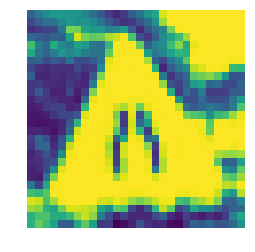

Shape: (28, 28), Min Intensity: 0.0489972664066, Max Int. 0.944154569328


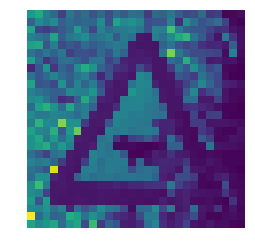

Shape: (28, 28), Min Intensity: 0.0917327258403, Max Int. 0.999912904412


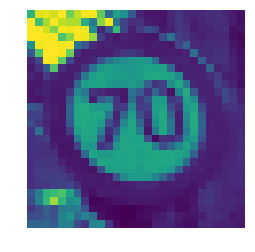

Shape: (28, 28), Min Intensity: 0.0502039215686, Max Int. 0.802724852941


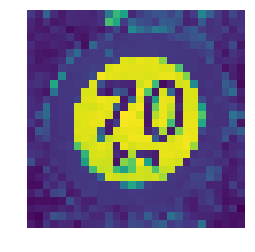

In [138]:
# Let us compare the image sizes for a bunch of images [SAME AS ABOVE SNIPPET]
want_to_compare = [300, 3650, 4000, 4250]

for i in range(len(want_to_compare)):
    plt.axis("off")
    plt.imshow(images28[want_to_compare[i]]) # NOTE: that this can be done from numpy arrays too i.e images_array
    print("Shape: {0}, Min Intensity: {1}, Max Int. {2}".format(images28[want_to_compare[i]].shape,
         images28[want_to_compare[i]].min(),
         images28[want_to_compare[i]].max()))
    plt.show()


### Yaay! Numpy array works too!

#### Question
Does transform.resize() from skimage work on numpy arrays?

#### Answer
We answer the above question here. It shows that resize() treats the incoming matrix or array of arrays as an image

Shape: (28, 28), Min Intensity: 0.199199526561, Max Int. 1.0


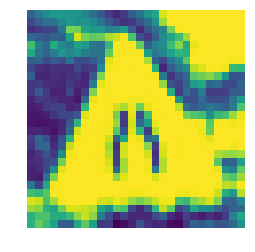

Shape: (28, 28), Min Intensity: 0.0489972664066, Max Int. 0.944154569328


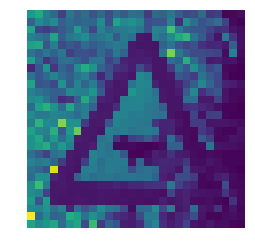

Shape: (28, 28), Min Intensity: 0.0917327258403, Max Int. 0.999912904412


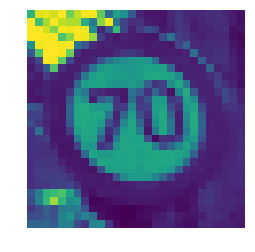

Shape: (28, 28), Min Intensity: 0.0502039215686, Max Int. 0.802724852941


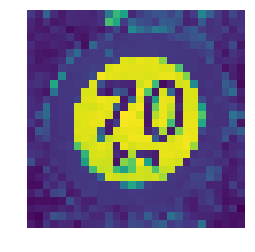

In [139]:
# we shall check with the numpy array the same stuff, here we use 32x32 for a change
images32 = [transform.resize(i, (32,32)) for i in images_array]

# Let us compare the image sizes for a bunch of images [SAME AS ABOVE SNIPPET]
want_to_compare = [300, 3650, 4000, 4250]

for i in range(len(want_to_compare)):
    plt.axis("off")
    plt.imshow(images28[want_to_compare[i]]) # NOTE: that this can be done from numpy arrays too i.e images_array
    print("Shape: {0}, Min Intensity: {1}, Max Int. {2}".format(images28[want_to_compare[i]].shape,
         images28[want_to_compare[i]].min(),
         images28[want_to_compare[i]].max()))
    plt.show()


### Dimension Check!

Find the dimensions of images, images_array, images28, images28_array

In [153]:
print("images dimensions", images[0].shape) 
# images is a list, images[0] is an array of array .shape, .size, .ndim etc  will work only with NUMPY arrays
# is RGB format so 3 dims per image

print("images_array: ", images_array.size) # same as len()
print("images_array: shape ", images_array.shape) # rank 1 tensor, NOT USEFUL

# images28 is a list, images28[0] works, is grayscale format so 2 dims per image
print("images28 dimensions", images28[0].shape) 
print("images28_array: shape ", images28_array.shape) # rank 3 tensor, length is 4575, 28 and 28 in each of the dims

# labels too
#print("labels dimensions", labels[0].shape) # int a single entry does not have shape WRONG
print("labels_array: shape ", labels_array.shape)

# ALL THE ABOVE STANDS TRUW FOR Test data as well, only varying with 4575 samples

('images dimensions', (51, 49, 3))
('images_array: ', 4575)
('images_array: shape ', (4575,))
('images28 dimensions', (28, 28))
('images28_array: shape ', (4575, 28, 28))
('labels_array: shape ', (4575,))


### Note
The maximum and minimum intensity values have been normalized between 0 to 1 from 0 to 255

### Gray Colormap
If you are worried that the images don't look gray, just change the color map when using imshow. But, do note that the shape of images28 is still 3 dimensions, 1 for samples, rest 2 dim for image (Gray) not color RGB

Shape: (28, 28), Min Intensity: 0.199199526561, Max Int. 1.0


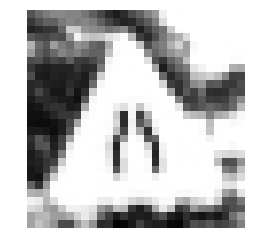

Shape: (28, 28), Min Intensity: 0.0489972664066, Max Int. 0.944154569328


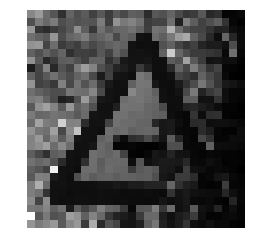

Shape: (28, 28), Min Intensity: 0.0917327258403, Max Int. 0.999912904412


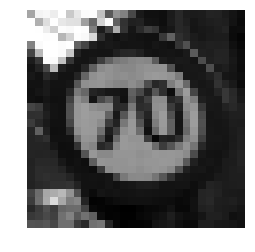

Shape: (28, 28), Min Intensity: 0.0502039215686, Max Int. 0.802724852941


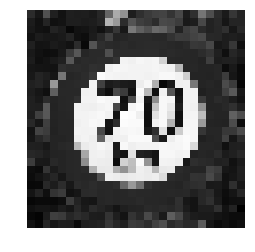

('images32 type: ', <type 'list'>)
('images28 type: ', <type 'list'>)
('images28_array: ', <type 'list'>)


In [162]:
# we shall check with the numpy array the same stuff, here we use 32x32 for a change
images32 = [transform.resize(i, (32,32)) for i in images_array]

# Let us compare the image sizes for a bunch of images [SAME AS ABOVE SNIPPET]
want_to_compare = [300, 3650, 4000, 4250]

for i in range(len(want_to_compare)):
    plt.axis("off")
    plt.imshow(images28[want_to_compare[i]], cmap="gray") # NOTE: that this can be done from numpy arrays too i.e images_array
    print("Shape: {0}, Min Intensity: {1}, Max Int. {2}".format(images28[want_to_compare[i]].shape,
         images28[want_to_compare[i]].min(),
         images28[want_to_compare[i]].max()))
    plt.show()
    
print("images32 type: ", type(images32))

# compare with image28 and image28_array
print("images28 type: ", type(images28))
print("images28_array: ", type(images28))

## Tip : Reuse a function
Above we used the plotting function quite many times. It also lead to more number of lines of code. We can use UDF for them just lke the import_data function.

Next we will start with the neural network modelling i.e creating the graph as the "results" we had created at the very beginning. Once the graph is created, we shall execute it using a tf.Session()


# TensorFlow Routines

The tensorflow Graph is build layer after layer below.

In [156]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])
images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

('images_flat: ', <tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 784) dtype=float32>)
('logits: ', <tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>)
('loss: ', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
('predicted_labels: ', <tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>)


## Running the Neural Network
In the above model, you might not find the "result" graph, but to initialize all the variables declared above, we have a global initializer which instructs the tensorflow to initialize all associated with tf.something

In [170]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28_array, y: labels})
        if i % 10 == 0:
            #print('EPOCH', i)
            #print("Loss: ", loss)
            print("EPOCH " + str(i) + "     Accuracy: " + str(accuracy_val))

EPOCH 0     Accuracy: 36.43694
EPOCH 10     Accuracy: 28.45858
EPOCH 20     Accuracy: 33.35825
EPOCH 30     Accuracy: 34.193226
EPOCH 40     Accuracy: 34.35672
EPOCH 50     Accuracy: 35.09246
EPOCH 60     Accuracy: 34.877815
EPOCH 70     Accuracy: 35.065575
EPOCH 80     Accuracy: 35.118908
EPOCH 90     Accuracy: 35.017925
EPOCH 100     Accuracy: 35.0
EPOCH 110     Accuracy: 34.93705
EPOCH 120     Accuracy: 34.936832
EPOCH 130     Accuracy: 34.957596
EPOCH 140     Accuracy: 34.91191
EPOCH 150     Accuracy: 34.92022
EPOCH 160     Accuracy: 34.850273
EPOCH 170     Accuracy: 34.83366
EPOCH 180     Accuracy: 34.78011
EPOCH 190     Accuracy: 34.757595
EPOCH 200     Accuracy: 34.73858


## Verifying the results

In [172]:
random_samples_indexes = random.sample(range(len(images28)), 10)
random_samples_images = [images28[i] for i in random_samples_indexes]
random_samples_labels = [labels[i] for i in random_samples_indexes]
# these contain the 28x28 images, 10 of them in the list random_samples

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: random_samples_images})[0]
                        
# Print the real and predicted labels
print(random_samples_labels)
print(predicted)

[40, 61, 56, 14, 41, 22, 23, 10, 55, 19]
[38 61 56 40 40 22 28 13 56 19]


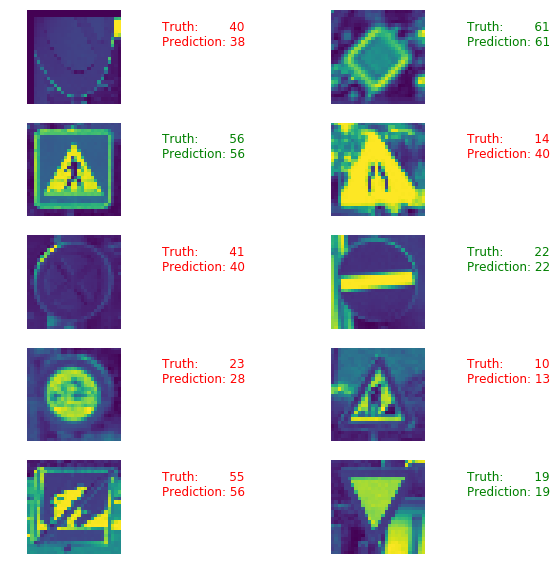

In [173]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(random_samples_images)):
    truth = random_samples_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(random_samples_images[i])

plt.show()

In [174]:
sess.close()

we will continue soon...

## Over!